In [20]:
from common.problem import Problem
from algorithm.idlhc import IDLHC
import pandas as pd

generations = 100
num_of_individuals = 100
num_of_variables = 100
direction = "MAX"

num_pdf = 20 
num_cut_pdf = 0.1

In [21]:
from bench_algorithms import Knapsack
import random

capacity = 2000
values = [random.randint(1, 100) for i in range(num_of_variables)]
weights = [random.randint(1, 100) for i in range(num_of_variables)]
ratios = [values[i] / weights[i] for i in range(num_of_variables)]

sorted_ratio_indexes = sorted(range(len(values)), key=lambda i: values[i])

#knapsack_vars = Knapsack(
    #capacity=capacity,
    #values=values,
    #weights=weights,
    #sorted_ratio_indexes=sorted_ratio_indexes,
#)

In [28]:
# define a classe de problema
knapsack_tests_data = pd.read_csv('test_data/knapsack_problems.csv')

#for data_row in knapsack_tests_data.iloc:
data_row = knapsack_tests_data.iloc[0]
capacity = data_row["capacity"]
values = data_row["values"]
weights = data_row["weights"]
ratios = data_row["ratios"]
sorted_ratio_indexes = data_row["sorted_ratio_indexes"]

print(capacity)
print(type(sorted_ratio_indexes))

knapsack = Knapsack(capacity, values, weights, sorted_ratio_indexes)

problem = Problem(
    num_of_variables=num_of_variables,
    num_of_individuals=num_of_individuals,
    num_of_generations=generations,
    objective=[knapsack.bench],
    repair=[knapsack.repair],
    mutation=(1 / num_of_variables),
    variables_range=[0, 1],
    direction=direction,
    initial_population_type=1,
)

2000
[68, 88, 65, 49, 94, 71, 38, 43, 48, 12, 5, 89, 52, 1, 73, 55, 35, 69, 44, 79, 83, 85, 11, 64, 29, 4, 3, 16, 13, 81, 10, 58, 67, 22, 46, 84, 96, 33, 14, 70, 59, 0, 75, 41, 18, 86, 53, 97, 24, 92, 60, 32, 77, 8, 6, 76, 28, 25, 15, 9, 20, 66, 87, 61, 45, 36, 17, 27, 56, 63, 30, 26, 93, 2, 7, 40, 99, 82, 90, 98, 34, 42, 21, 47, 80, 39, 62, 72, 57, 31, 78, 19, 37, 91, 74, 23, 50, 51, 95, 54]


Generation: 0
Generation: 1
Generation: 2
Generation: 3
Generation: 4
Generation: 5
Generation: 6
Generation: 7
Generation: 8
Generation: 9
Generation: 10
Generation: 11
Generation: 12
Generation: 13
Generation: 14
Generation: 15
Generation: 16
Generation: 17
Generation: 18
Generation: 19
Generation: 20
Generation: 21
Generation: 22
Generation: 23
Generation: 24
Generation: 25
Generation: 26
Generation: 27
Generation: 28
Generation: 29
Generation: 30
Generation: 31
Generation: 32
Generation: 33
Generation: 34
Generation: 35
Generation: 36
Generation: 37
Generation: 38
Generation: 39
Generation: 40
Generation: 41
Generation: 42
Generation: 43
Generation: 44
Generation: 45
Generation: 46
Generation: 47
Generation: 48
Generation: 49
Generation: 50
Generation: 51
Generation: 52
Generation: 53
Generation: 54
Generation: 55
Generation: 56
Generation: 57
Generation: 58
Generation: 59
Generation: 60
Generation: 61
Generation: 62
Generation: 63
Generation: 64
Generation: 65
Generation: 66
Gener

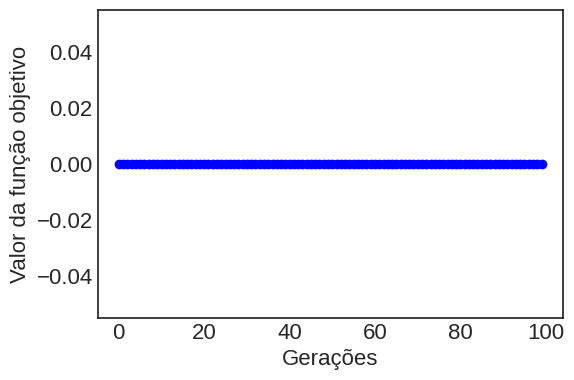

In [23]:
num_iterations = 1

first_gens = []
best_values = []
population_gen_type = problem.initial_population_type
problem_type = "knapsack"
convergences = []

for i in range(num_iterations):
    iteration = IDLHC(problem, num_pdf=num_pdf, num_cut_pdf=num_cut_pdf)
    iteration.do()
    best_value = max(iteration.convergence_array)
    best_values.append(best_value)
    convergences.append(iteration.convergence_array)

    for n in range(len(iteration.convergence_array)):
        if iteration.convergence_array[n] == best_values[i]:
            first_gens.append(n)
            break
    
    # item_var = {"Iteration": i, "Best value per generation": max(iteration.convergence_array), "First generation to reach best value": n, "type": problem.initial_population_type}



In [24]:
#import pandas as pd
#from pathlib import Path  

#df2 = pd.DataFrame(

    #{
        #"best_value" : best_values,
        #"firstgen_with_best_value": first_gens,
        #"population_gen_type": population_gen_type,
        #"problem_type" : problem_type,
        #"convergence_array": ''
    #}
#)

#for i in range(len(best_values)):
    #df2.at[i,"convergence_array"] = convergences[i]

#filepath = Path('metrics/knapsack.csv')

#filepath.parent.mkdir(parents=True, exist_ok=True)  

#df2.to_csv(filepath,mode='a',index=False,header=False)

In [25]:
#import pandas as pd
#from pathlib import Path  

#final_dict = {}
#num_of_problems = 100
#capacity = 2000

#def gen_problem_vars():
    #values= [random.randint(1, 100) for i in range(num_of_variables)]
    #weights= [random.randint(1, 100) for i in range(num_of_variables)]

    #ratios = [values[i] / weights[i] for i in range(num_of_variables)]

    #sorted_ratio_indexes = sorted(
        #range(len(values)), key=lambda i: ratios[i]
    #)
    #return values,weights,ratios,sorted_ratio_indexes

#zero_list = ['' for i in range(num_of_problems)]

#problems_to_bench = pd.DataFrame(
    
    #{
        #"values": zero_list.copy(),
        #"weights": zero_list.copy(),
        #"sorted_ratio_indexes": zero_list.copy(),
        #"ratios": zero_list.copy(),
        #"capacity": capacity,
    #}
#)


#for i in range(num_of_problems):
    #values,weights,ratios,sorted_ratio_indexes = gen_problem_vars()
    
    #problems_to_bench.at[i, "values"] = values
    #problems_to_bench.at[i, "weights"] = weights
    #problems_to_bench.at[i, "ratios"] = ratios
    #problems_to_bench.at[i, "sorted_ratio_indexes"] = sorted_ratio_indexes


#filepath_1 = Path('problems/knapsack_problems.csv')

#filepath_1.parent.mkdir(parents=True, exist_ok=True)  

#problems_to_bench.to_csv(filepath_1,mode='a',index=False,header=True)

In [26]:
#problems_to_bench.head()

In [27]:
#df2.head()